# 22AIE304 Deep Learning Labsheet 5

## Name: Aniketh Vijesh
## Roll No: AM.EN.U4AIE22009

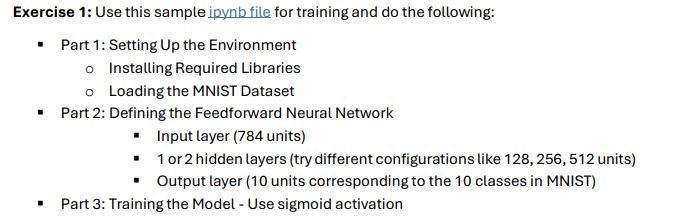

In [13]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [14]:
# Setting up the datasets and Dataloaders

train_set = datasets.MNIST(
    root="./data", train=True, download=True, transform=transforms.ToTensor()
)
test_set = datasets.MNIST(
    root="./data", train=False, download=True, transform=transforms.ToTensor()
)


train_loader = DataLoader(dataset=train_set, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset=test_set, batch_size=64, shuffle=False, num_workers=2)

In [ ]:
class FeedforwardNeuralNet(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, output_size=10, num_hidden_layers=2, activation=nn.ReLU()):
        super(FeedforwardNeuralNet, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size)

        self.hidden_layers = nn.ModuleList([nn.Linear(hidden_size, hidden_size) for _ in range(num_hidden_layers - 1)])

        self.output = nn.Linear(hidden_size, output_size)
        

        self.activation = activation

    def forward(self, x):
        x = x.view(x.size(0), -1)  

        x = self.activation(self.fc1(x))
        
        for layer in self.hidden_layers:
            x = self.activation(layer(x))

        x = self.output(x)
        return x


In [26]:
# Training function
def train_model(model, train_loader, optimizer, criterion, num_epochs):
    model.train()
    train_losses = []
    train_accuracies = []
    for epoch in range(num_epochs):
        correct = 0
        total = 0
        epoch_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_accuracy = correct / total
        train_losses.append(epoch_loss / len(train_loader))
        train_accuracies.append(epoch_accuracy)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {epoch_accuracy:.4f}")

    return train_losses, train_accuracies


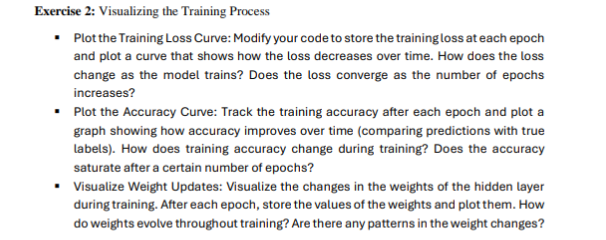

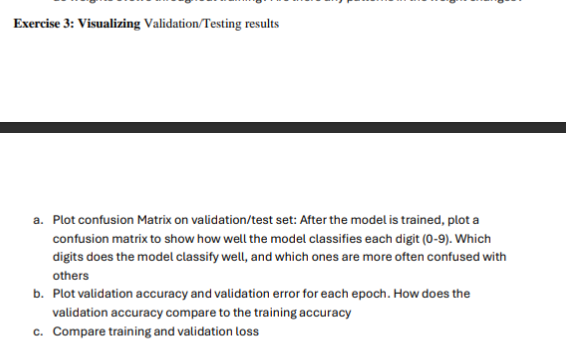

In [27]:
# Plot training loss and accuracy
def plot_training_curves(train_losses, train_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss Curve")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Training Accuracy", color='orange')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy Curve")
    plt.legend()

    plt.show()


In [28]:
# Evaluate the model on the test set
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[i for i in range(10)])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    return accuracy


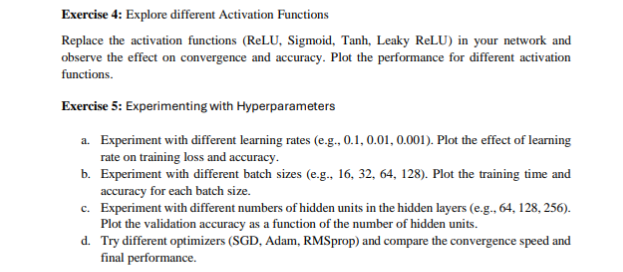

Training with ReLU activation function...


Epoch 1/10, Loss: 0.3371, Accuracy: 0.9079
Epoch 2/10, Loss: 0.1553, Accuracy: 0.9548
Epoch 3/10, Loss: 0.1077, Accuracy: 0.9685
Epoch 4/10, Loss: 0.0820, Accuracy: 0.9760
Epoch 5/10, Loss: 0.0655, Accuracy: 0.9802
Epoch 6/10, Loss: 0.0528, Accuracy: 0.9842
Epoch 7/10, Loss: 0.0427, Accuracy: 0.9872
Epoch 8/10, Loss: 0.0360, Accuracy: 0.9893
Epoch 9/10, Loss: 0.0294, Accuracy: 0.9916
Epoch 10/10, Loss: 0.0247, Accuracy: 0.9932
Test Accuracy: 0.9777


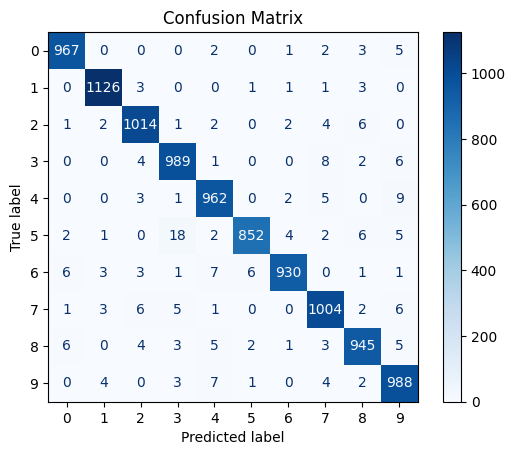

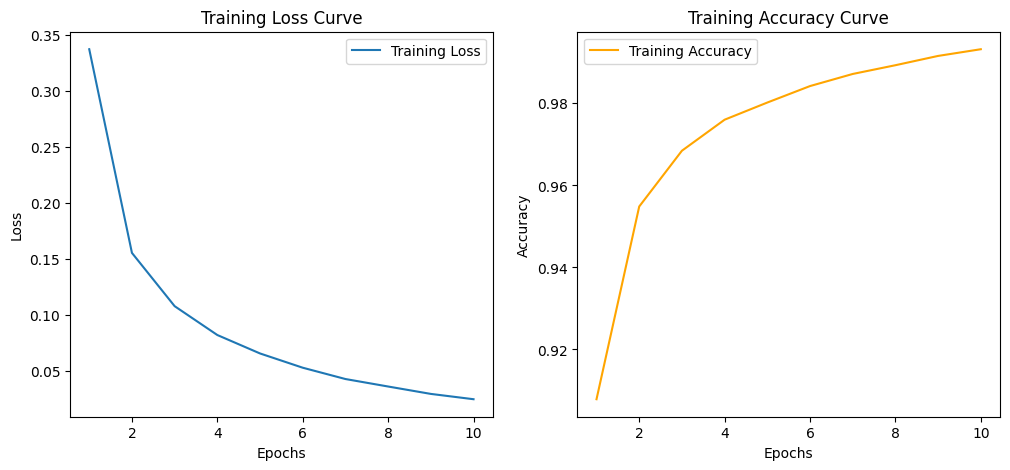

Training with Sigmoid activation function...
Epoch 1/10, Loss: 0.5352, Accuracy: 0.8706
Epoch 2/10, Loss: 0.2272, Accuracy: 0.9351
Epoch 3/10, Loss: 0.1745, Accuracy: 0.9495
Epoch 4/10, Loss: 0.1419, Accuracy: 0.9585
Epoch 5/10, Loss: 0.1179, Accuracy: 0.9658
Epoch 6/10, Loss: 0.1001, Accuracy: 0.9710
Epoch 7/10, Loss: 0.0855, Accuracy: 0.9761
Epoch 8/10, Loss: 0.0735, Accuracy: 0.9794
Epoch 9/10, Loss: 0.0642, Accuracy: 0.9825
Epoch 10/10, Loss: 0.0563, Accuracy: 0.9844
Test Accuracy: 0.9753


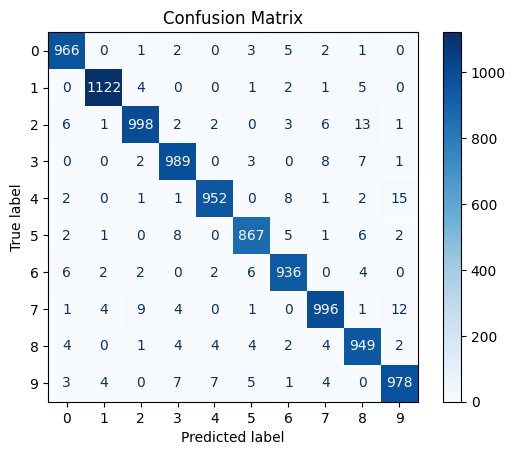

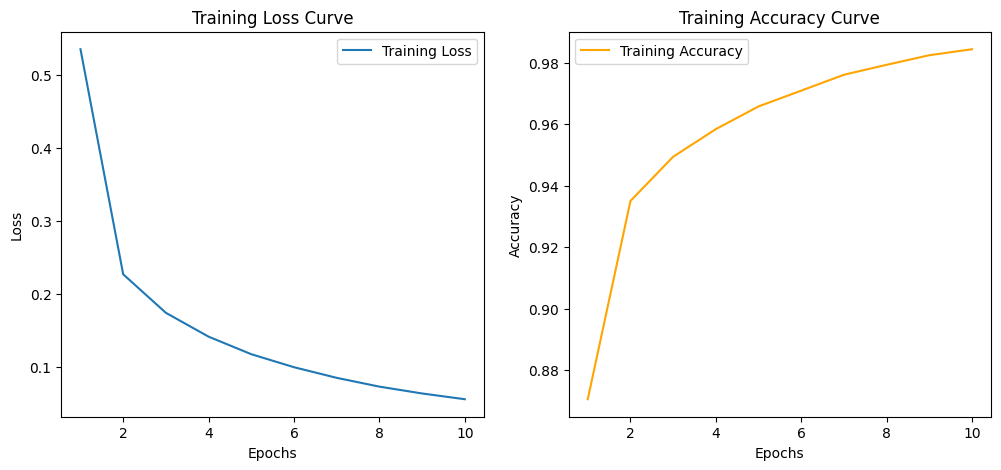

Training with Tanh activation function...
Epoch 1/10, Loss: 0.3439, Accuracy: 0.9050
Epoch 2/10, Loss: 0.1648, Accuracy: 0.9525
Epoch 3/10, Loss: 0.1158, Accuracy: 0.9661
Epoch 4/10, Loss: 0.0886, Accuracy: 0.9745
Epoch 5/10, Loss: 0.0685, Accuracy: 0.9809
Epoch 6/10, Loss: 0.0545, Accuracy: 0.9845
Epoch 7/10, Loss: 0.0437, Accuracy: 0.9881
Epoch 8/10, Loss: 0.0351, Accuracy: 0.9910
Epoch 9/10, Loss: 0.0278, Accuracy: 0.9932
Epoch 10/10, Loss: 0.0224, Accuracy: 0.9952
Test Accuracy: 0.9772


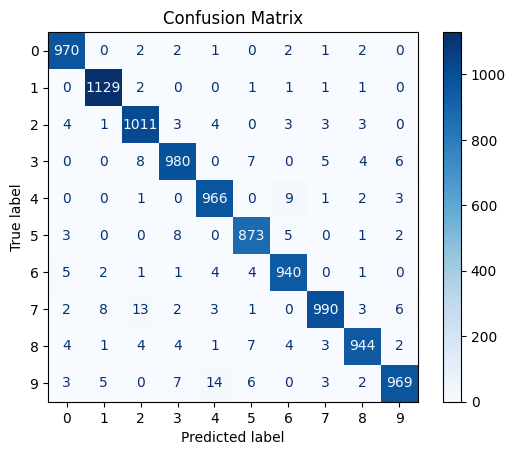

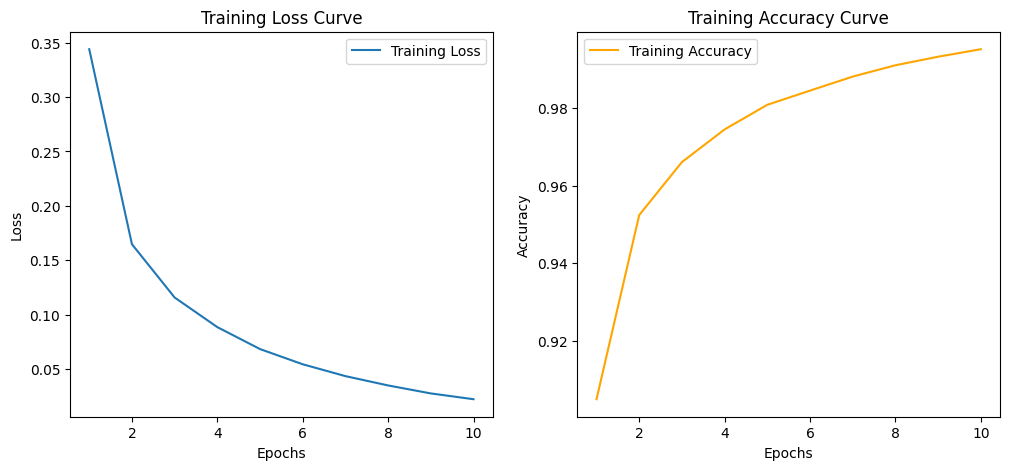

Training with LeakyReLU activation function...
Epoch 1/10, Loss: 0.3433, Accuracy: 0.9057
Epoch 2/10, Loss: 0.1570, Accuracy: 0.9540
Epoch 3/10, Loss: 0.1095, Accuracy: 0.9676
Epoch 4/10, Loss: 0.0827, Accuracy: 0.9754
Epoch 5/10, Loss: 0.0659, Accuracy: 0.9801
Epoch 6/10, Loss: 0.0536, Accuracy: 0.9844
Epoch 7/10, Loss: 0.0445, Accuracy: 0.9862
Epoch 8/10, Loss: 0.0365, Accuracy: 0.9892
Epoch 9/10, Loss: 0.0297, Accuracy: 0.9916
Epoch 10/10, Loss: 0.0255, Accuracy: 0.9925
Test Accuracy: 0.9773


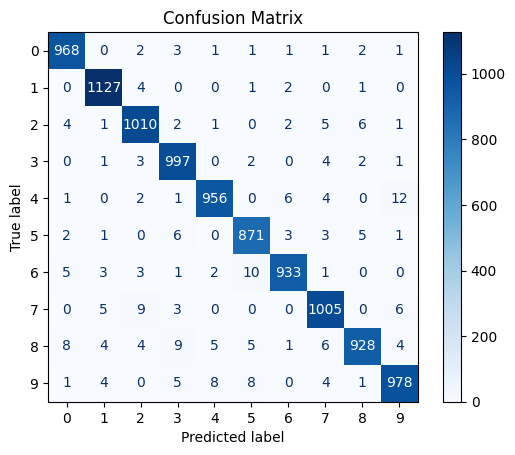

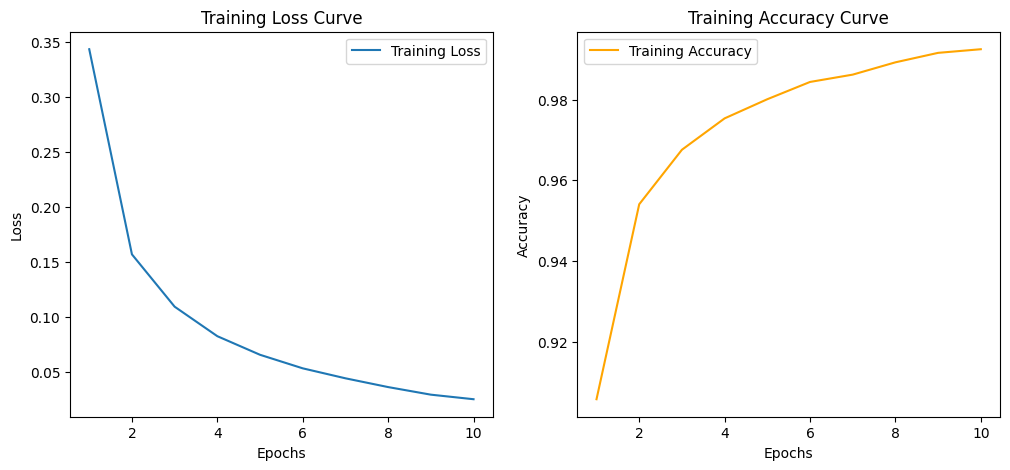

In [29]:
activation_functions = {"ReLU": nn.ReLU(), "Sigmoid": nn.Sigmoid(), "Tanh": nn.Tanh(), "LeakyReLU": nn.LeakyReLU()}
results = {}

for name, activation_function in activation_functions.items():
    print(f"Training with {name} activation function...")
    model = FeedforwardNeuralNet(activation=activation_function)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    train_losses, train_accuracies = train_model(model, train_loader, optimizer, criterion, num_epochs=10)
    test_accuracy = evaluate_model(model, test_loader)
    results[name] = {"train_losses": train_losses, "train_accuracies": train_accuracies, "test_accuracy": test_accuracy}

    plot_training_curves(train_losses, train_accuracies)


Training with learning rate 0.1...
Epoch 1/10, Loss: 0.9888, Accuracy: 0.7327
Epoch 2/10, Loss: 1.0189, Accuracy: 0.6852
Epoch 3/10, Loss: 0.9673, Accuracy: 0.6906
Epoch 4/10, Loss: 0.9603, Accuracy: 0.6927
Epoch 5/10, Loss: 0.9743, Accuracy: 0.6777
Epoch 6/10, Loss: 1.0411, Accuracy: 0.6544
Epoch 7/10, Loss: 1.0910, Accuracy: 0.6501
Epoch 8/10, Loss: 1.0051, Accuracy: 0.6578
Epoch 9/10, Loss: 1.0378, Accuracy: 0.6534
Epoch 10/10, Loss: 1.0759, Accuracy: 0.6423


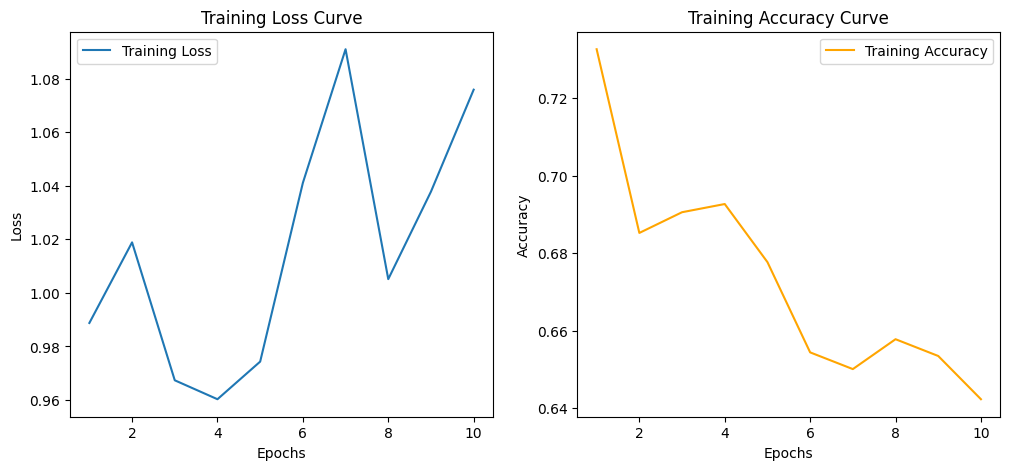

Training with learning rate 0.01...
Epoch 1/10, Loss: 0.2247, Accuracy: 0.9315
Epoch 2/10, Loss: 0.1319, Accuracy: 0.9607
Epoch 3/10, Loss: 0.1096, Accuracy: 0.9687
Epoch 4/10, Loss: 0.1010, Accuracy: 0.9712
Epoch 5/10, Loss: 0.0951, Accuracy: 0.9731
Epoch 6/10, Loss: 0.0914, Accuracy: 0.9760
Epoch 7/10, Loss: 0.0781, Accuracy: 0.9800
Epoch 8/10, Loss: 0.0764, Accuracy: 0.9807
Epoch 9/10, Loss: 0.0707, Accuracy: 0.9818
Epoch 10/10, Loss: 0.0736, Accuracy: 0.9819


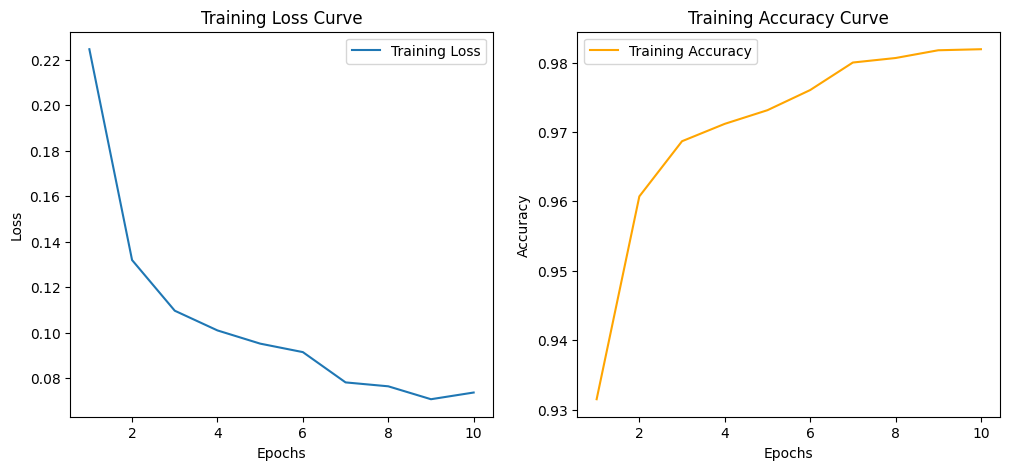

Training with learning rate 0.001...
Epoch 1/10, Loss: 0.3416, Accuracy: 0.9075
Epoch 2/10, Loss: 0.1549, Accuracy: 0.9556
Epoch 3/10, Loss: 0.1072, Accuracy: 0.9687
Epoch 4/10, Loss: 0.0812, Accuracy: 0.9760
Epoch 5/10, Loss: 0.0651, Accuracy: 0.9806
Epoch 6/10, Loss: 0.0529, Accuracy: 0.9838
Epoch 7/10, Loss: 0.0441, Accuracy: 0.9867
Epoch 8/10, Loss: 0.0354, Accuracy: 0.9891
Epoch 9/10, Loss: 0.0289, Accuracy: 0.9910
Epoch 10/10, Loss: 0.0237, Accuracy: 0.9933


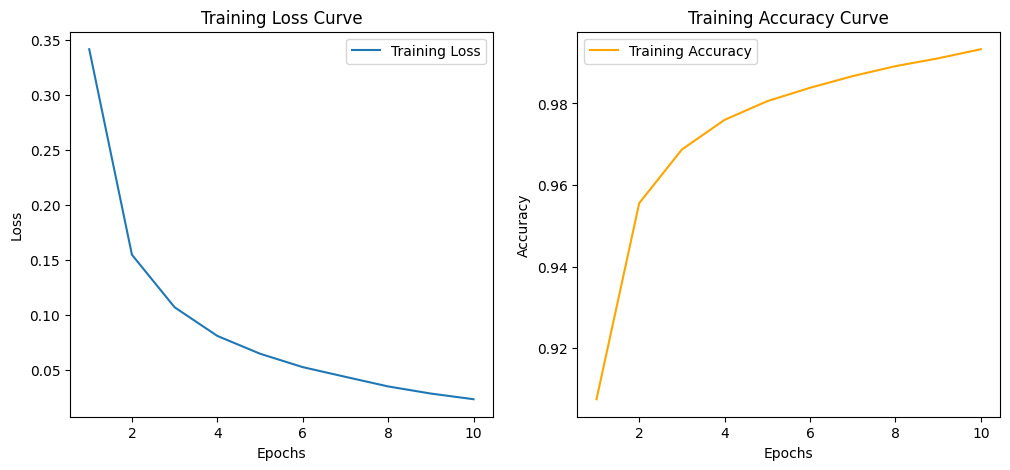

Training with batch size 16...
Epoch 1/10, Loss: 0.2567, Accuracy: 0.9263
Epoch 2/10, Loss: 0.1140, Accuracy: 0.9652
Epoch 3/10, Loss: 0.0762, Accuracy: 0.9764
Epoch 4/10, Loss: 0.0574, Accuracy: 0.9822
Epoch 5/10, Loss: 0.0449, Accuracy: 0.9861
Epoch 6/10, Loss: 0.0350, Accuracy: 0.9887
Epoch 7/10, Loss: 0.0287, Accuracy: 0.9905
Epoch 8/10, Loss: 0.0242, Accuracy: 0.9921
Epoch 9/10, Loss: 0.0196, Accuracy: 0.9936
Epoch 10/10, Loss: 0.0160, Accuracy: 0.9947


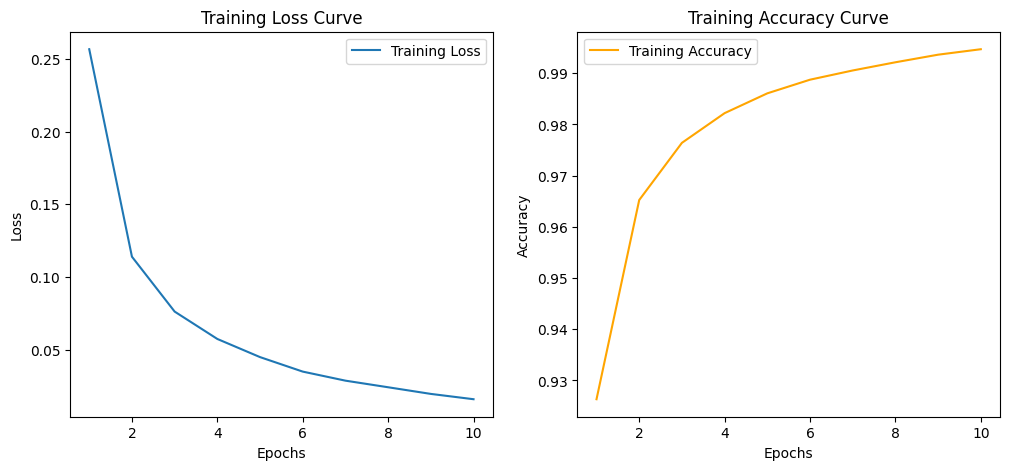

Training with batch size 32...
Epoch 1/10, Loss: 0.2976, Accuracy: 0.9181
Epoch 2/10, Loss: 0.1296, Accuracy: 0.9625
Epoch 3/10, Loss: 0.0896, Accuracy: 0.9735
Epoch 4/10, Loss: 0.0667, Accuracy: 0.9800
Epoch 5/10, Loss: 0.0519, Accuracy: 0.9841
Epoch 6/10, Loss: 0.0411, Accuracy: 0.9873
Epoch 7/10, Loss: 0.0347, Accuracy: 0.9896
Epoch 8/10, Loss: 0.0272, Accuracy: 0.9911
Epoch 9/10, Loss: 0.0234, Accuracy: 0.9930
Epoch 10/10, Loss: 0.0189, Accuracy: 0.9944


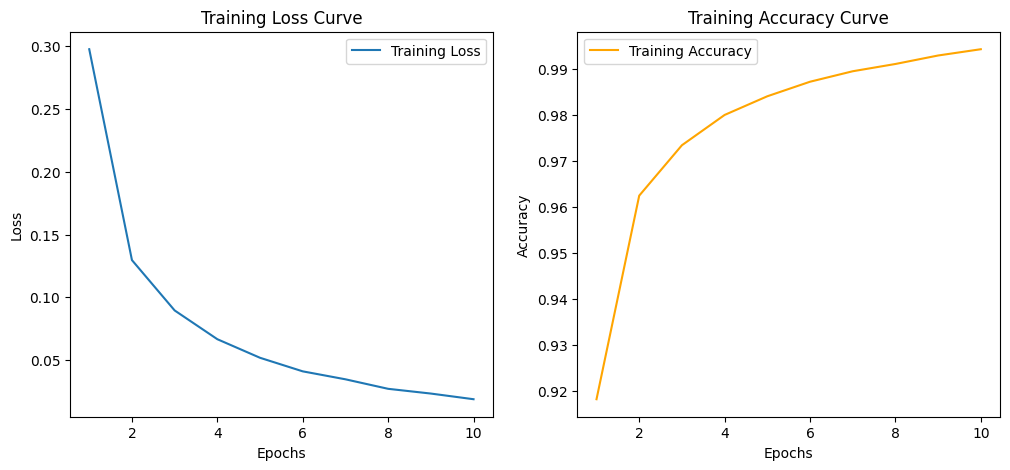

Training with batch size 64...
Epoch 1/10, Loss: 0.3470, Accuracy: 0.9059
Epoch 2/10, Loss: 0.1605, Accuracy: 0.9533
Epoch 3/10, Loss: 0.1104, Accuracy: 0.9673
Epoch 4/10, Loss: 0.0819, Accuracy: 0.9763
Epoch 5/10, Loss: 0.0656, Accuracy: 0.9807
Epoch 6/10, Loss: 0.0528, Accuracy: 0.9843
Epoch 7/10, Loss: 0.0425, Accuracy: 0.9880
Epoch 8/10, Loss: 0.0354, Accuracy: 0.9896
Epoch 9/10, Loss: 0.0280, Accuracy: 0.9920
Epoch 10/10, Loss: 0.0252, Accuracy: 0.9928


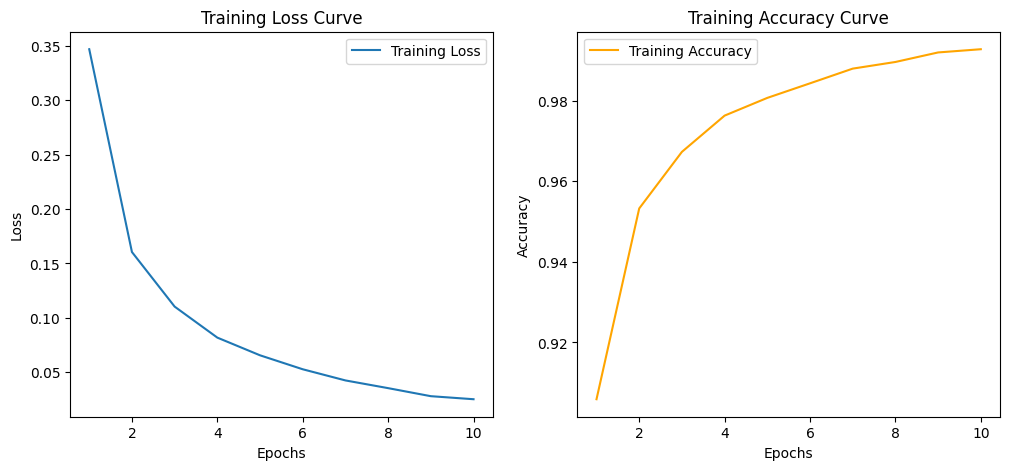

Training with batch size 128...
Epoch 1/10, Loss: 0.4102, Accuracy: 0.8930
Epoch 2/10, Loss: 0.1878, Accuracy: 0.9463
Epoch 3/10, Loss: 0.1369, Accuracy: 0.9609
Epoch 4/10, Loss: 0.1082, Accuracy: 0.9688
Epoch 5/10, Loss: 0.0870, Accuracy: 0.9751
Epoch 6/10, Loss: 0.0731, Accuracy: 0.9786
Epoch 7/10, Loss: 0.0613, Accuracy: 0.9826
Epoch 8/10, Loss: 0.0518, Accuracy: 0.9851
Epoch 9/10, Loss: 0.0444, Accuracy: 0.9871
Epoch 10/10, Loss: 0.0374, Accuracy: 0.9894


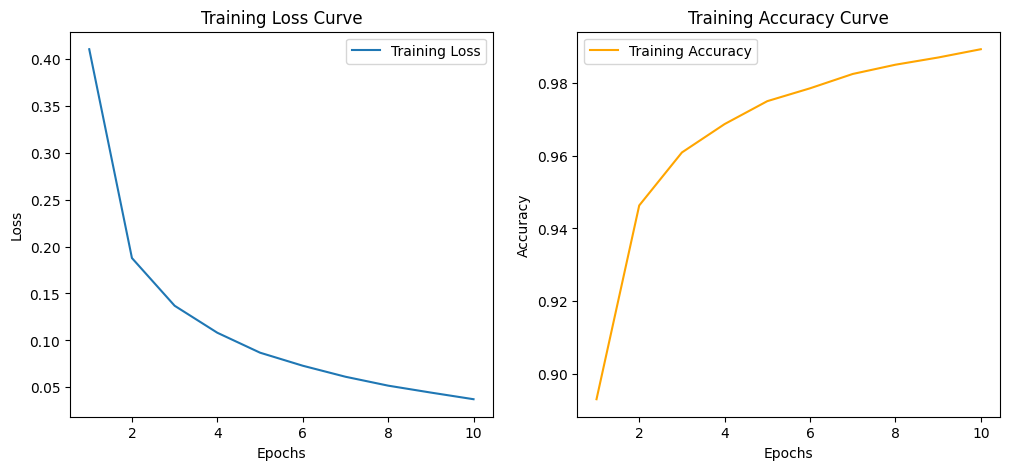

In [30]:
# Experiment with learning rates
learning_rates = [0.1, 0.01, 0.001]
for lr in learning_rates:
    print(f"Training with learning rate {lr}...")
    model = FeedforwardNeuralNet()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    train_losses, train_accuracies = train_model(model, train_loader, optimizer, criterion, num_epochs=10)
    plot_training_curves(train_losses, train_accuracies)

# Experiment with batch sizes
batch_sizes = [16, 32, 64, 128]
for batch_size in batch_sizes:
    train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True, num_workers=2)
    print(f"Training with batch size {batch_size}...")
    model = FeedforwardNeuralNet()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    train_losses, train_accuracies = train_model(model, train_loader, optimizer, criterion, num_epochs=10)
    plot_training_curves(train_losses, train_accuracies)


Training with SGD optimizer...
Epoch 1/10, Loss: 2.2572, Accuracy: 0.1666
Epoch 2/10, Loss: 2.1698, Accuracy: 0.3000
Epoch 3/10, Loss: 2.0675, Accuracy: 0.4807
Epoch 4/10, Loss: 1.9481, Accuracy: 0.6158
Epoch 5/10, Loss: 1.8129, Accuracy: 0.6794
Epoch 6/10, Loss: 1.6665, Accuracy: 0.7177
Epoch 7/10, Loss: 1.5171, Accuracy: 0.7424
Epoch 8/10, Loss: 1.3737, Accuracy: 0.7614
Epoch 9/10, Loss: 1.2437, Accuracy: 0.7781
Epoch 10/10, Loss: 1.1310, Accuracy: 0.7901


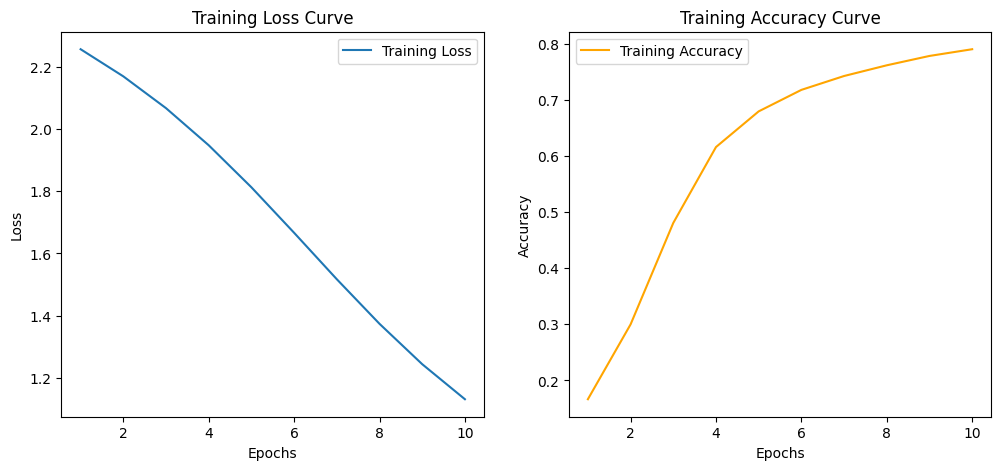

Training with Adam optimizer...
Epoch 1/10, Loss: 0.4111, Accuracy: 0.8913
Epoch 2/10, Loss: 0.1879, Accuracy: 0.9471
Epoch 3/10, Loss: 0.1365, Accuracy: 0.9604
Epoch 4/10, Loss: 0.1062, Accuracy: 0.9686
Epoch 5/10, Loss: 0.0858, Accuracy: 0.9750
Epoch 6/10, Loss: 0.0723, Accuracy: 0.9784
Epoch 7/10, Loss: 0.0607, Accuracy: 0.9823
Epoch 8/10, Loss: 0.0512, Accuracy: 0.9853
Epoch 9/10, Loss: 0.0436, Accuracy: 0.9875
Epoch 10/10, Loss: 0.0378, Accuracy: 0.9894


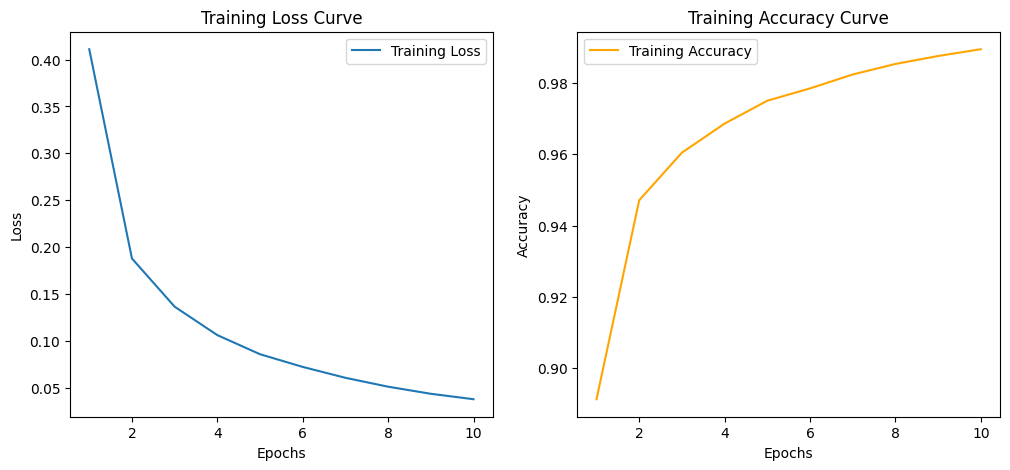

Training with RMSprop optimizer...
Epoch 1/10, Loss: 0.3190, Accuracy: 0.9096
Epoch 2/10, Loss: 0.1686, Accuracy: 0.9510
Epoch 3/10, Loss: 0.1224, Accuracy: 0.9646
Epoch 4/10, Loss: 0.0948, Accuracy: 0.9725
Epoch 5/10, Loss: 0.0763, Accuracy: 0.9781
Epoch 6/10, Loss: 0.0627, Accuracy: 0.9816
Epoch 7/10, Loss: 0.0528, Accuracy: 0.9841
Epoch 8/10, Loss: 0.0443, Accuracy: 0.9875
Epoch 9/10, Loss: 0.0376, Accuracy: 0.9892
Epoch 10/10, Loss: 0.0322, Accuracy: 0.9910


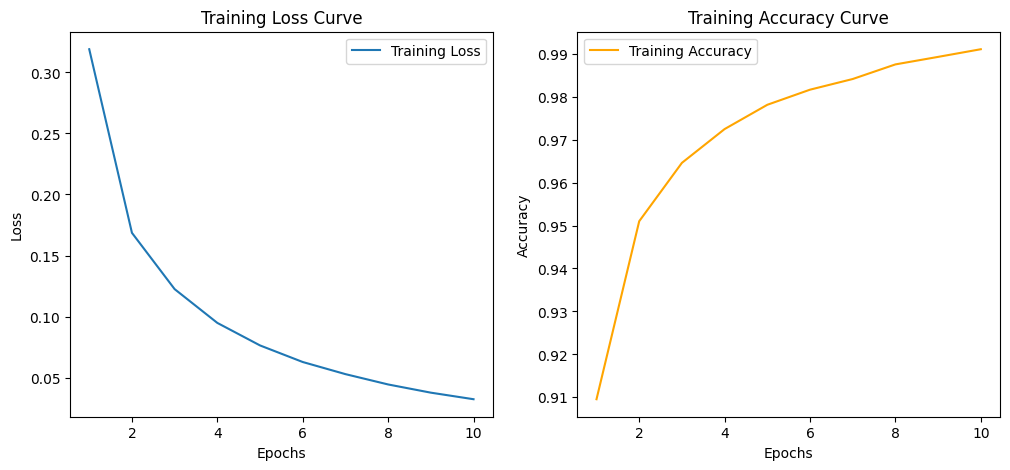

In [31]:
optimizers = {"SGD": optim.SGD, "Adam": optim.Adam, "RMSprop": optim.RMSprop}

for name, optimizer_class in optimizers.items():
    print(f"Training with {name} optimizer...")
    model = FeedforwardNeuralNet()
    optimizer = optimizer_class(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    train_losses, train_accuracies = train_model(model, train_loader, optimizer, criterion, num_epochs=10)
    plot_training_curves(train_losses, train_accuracies)
